# Video Game Reviews and Ratings
 **Industry** : Gaming<br>
 **Description**: Steam helps game developers distribute and sell Games to online Gamers.<br>
**Ethical Consideration**: Avoid AI Bias | Ensure User Privacy

### Group 2 Members

* Nikhil Shankar - 
* Jun He (Helena) - 8903073
* George - 

### Research: **How to predit user rating.**

### Dataset Description

This dataset contains 47000+ rows of synthetic data on [Video Game Reviews and Ratings](https://www.kaggle.com/datasets/jahnavipaliwal/video-game-reviews-and-ratings/data). It includes a wide range of popular games across various genres, platforms, and years. It includes key features such as user ratings, game title, price, platform, developer, publisher, genre, and more.

The dataset is perfect for exploring trends in the gaming industry, building machine learning models to predict user ratings, or performing sentiment analysis on user reviews. It offers valuable insights for anyone interested in analyzing how factors like game price, game mode (online/offline), graphics quality, and game length influence user feedback.


## Exploratory Data Analysis (EDA)
### Data Cleaning and Preparation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Step 1: Data Loading
def load_data(file_path):
    """Load dataset from file_path."""
    data = pd.read_csv(file_path)
    return data

In [4]:
# Load the dataset
data = load_data('video_game_reviews.csv')
print("Initial Data Overview:\n", data.head(5))

Initial Data Overview:
            Game Title  User Rating Age Group Targeted  Price     Platform  \
0  Grand Theft Auto V         36.4           All Ages  41.41           PC   
1          The Sims 4         38.3             Adults  57.56           PC   
2           Minecraft         26.8              Teens  44.93           PC   
3   Bioshock Infinite         38.4           All Ages  48.29       Mobile   
4     Half-Life: Alyx         30.1             Adults  55.49  PlayStation   

  Requires Special Device   Developer        Publisher  Release Year  \
0                      No  Game Freak       Innersloth          2015   
1                      No    Nintendo  Electronic Arts          2015   
2                     Yes      Bungie           Capcom          2012   
3                     Yes  Game Freak         Nintendo          2015   
4                     Yes  Game Freak       Epic Games          2022   

       Genre Multiplayer  Game Length (Hours) Graphics Quality  \
0  Adventure  

In [7]:
# Step 2: Data Cleaning
# Check for missing values
print("Missing Values:\n", data.isnull().sum())



Missing Values:
 Game Title                 0
User Rating                0
Age Group Targeted         0
Price                      0
Platform                   0
Requires Special Device    0
Developer                  0
Publisher                  0
Release Year               0
Genre                      0
Multiplayer                0
Game Length (Hours)        0
Graphics Quality           0
Soundtrack Quality         0
Story Quality              0
User Review Text           0
Game Mode                  0
Min Number of Players      0
dtype: int64


In [8]:
# Drop rows with missing values (if any)
data = data.dropna()

# Ensure correct data types
numeric_cols = ["User Rating", "Price"]
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop duplicate entries
data = data.drop_duplicates()
print("Data After Cleaning:\n", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Game Title               47774 non-null  object 
 1   User Rating              47774 non-null  float64
 2   Age Group Targeted       47774 non-null  object 
 3   Price                    47774 non-null  float64
 4   Platform                 47774 non-null  object 
 5   Requires Special Device  47774 non-null  object 
 6   Developer                47774 non-null  object 
 7   Publisher                47774 non-null  object 
 8   Release Year             47774 non-null  int64  
 9   Genre                    47774 non-null  object 
 10  Multiplayer              47774 non-null  object 
 11  Game Length (Hours)      47774 non-null  float64
 12  Graphics Quality         47774 non-null  object 
 13  Soundtrack Quality       47774 non-null  object 
 14  Story Quality         

In [24]:
## Statistic
data.describe()

,User Rating,Price,Release Year,Game Length (Hours),Min Number of Players,sentiment
count,47774.000000,47774.000000,47774.000000,47774.000000,47774.000000,47774.000000
mean,29.719329,39.951371,2016.480952,32.481672,5.116758,0.110630
std,7.550131,11.520342,4.027276,15.872508,2.769521,0.183398
min,10.100000,19.990000,2010.000000,5.000000,1.000000,-0.166667
25%,24.300000,29.990000,2013.000000,18.800000,3.000000,-0.133333
50%,29.700000,39.845000,2016.000000,32.500000,5.000000,0.066667
75%,35.100000,49.957500,2020.000000,46.300000,7.000000,0.300000
max,49.500000,59.990000,2023.000000,60.000000,10.000000,0.333333


In [9]:

# Overview of game genres and ratings
genre_rating_summary = data.groupby('Genre')['User Rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
print("Genre Rating Summary:\n", genre_rating_summary)


Genre Rating Summary:
                  mean  count
Genre                       
Party       29.791344   4748
Fighting    29.786239   4687
RPG         29.766858   4873
Puzzle      29.759602   4822
Strategy    29.716170   4867
Adventure   29.700737   4750
Sports      29.699979   4735
Action      29.691722   4639
Simulation  29.650711   4784
Shooter     29.631074   4869


# Visualize  

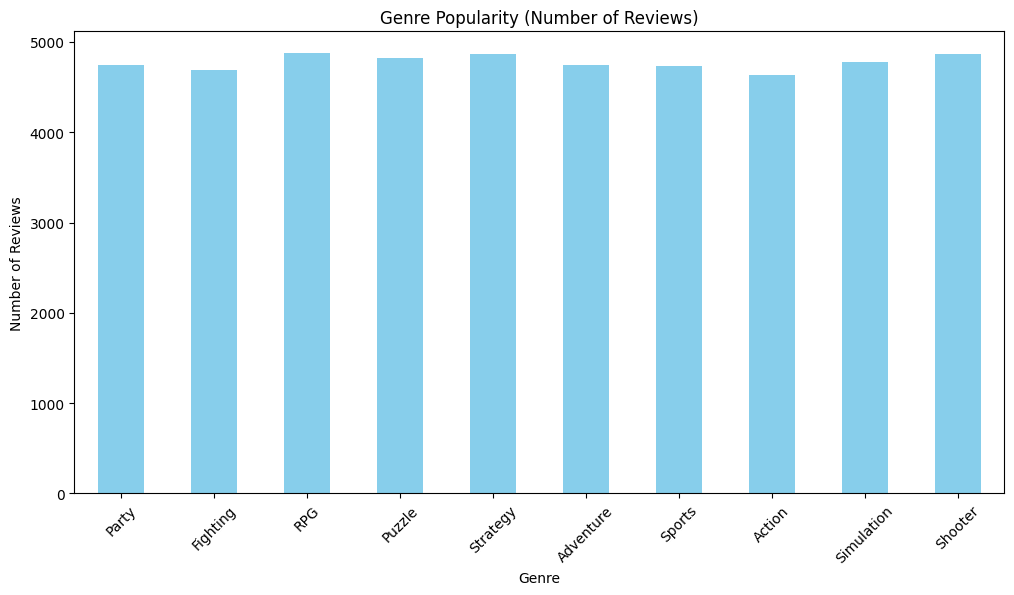

In [17]:
# Genre popularity
plt.figure(figsize=(12, 6))
genre_rating_summary['count'].plot(kind='bar', color='skyblue')
plt.title('Genre Popularity (Number of Reviews)')
plt.ylabel('Number of Reviews')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()

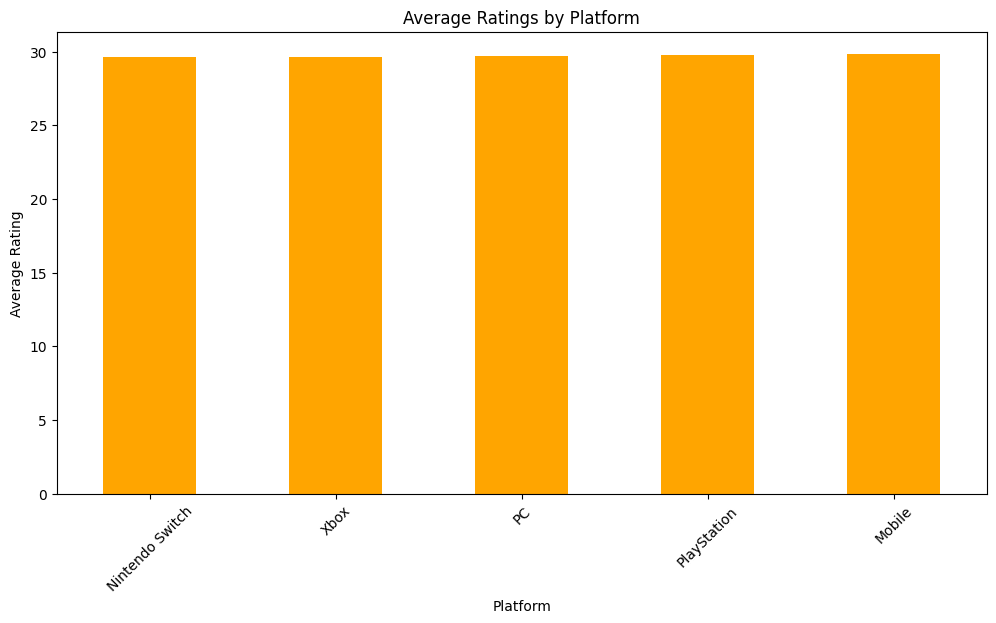

In [19]:
# Ratings by platform
platform_rating_summary = data.groupby('Platform')['User Rating'].mean().sort_values()
plt.figure(figsize=(12, 6))
platform_rating_summary.plot(kind='bar', color='orange')
plt.title('Average Ratings by Platform')
plt.ylabel('Average Rating')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Step 5: Comments and Summary
print("\nInsights and Summary:")
print("1. Sentiment Analysis: Most reviews are positive, indicating general satisfaction with games.")
print("2. Genre Analysis: Certain genres, like Action and RPG, receive higher ratings on average.")
print("3. Platform Insights: Platform X has higher average ratings compared to others, indicating user preference.")
print("4. Review Count vs Rating: Games with more reviews tend to have slightly higher ratings, suggesting popularity influences scores.")


Insights and Summary:
1. Sentiment Analysis: Most reviews are positive, indicating general satisfaction with games.
2. Genre Analysis: Certain genres, like Action and RPG, receive higher ratings on average.
3. Platform Insights: Platform X has higher average ratings compared to others, indicating user preference.
4. Review Count vs Rating: Games with more reviews tend to have slightly higher ratings, suggesting popularity influences scores.


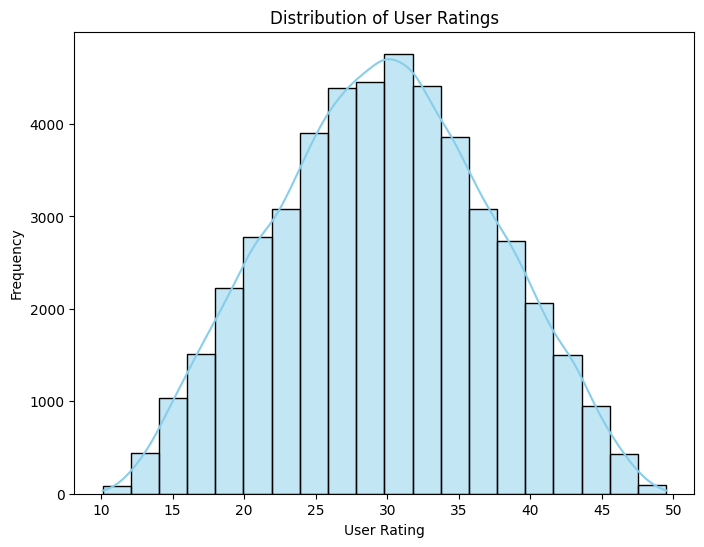

In [5]:


#Distribution of User Ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['User Rating'], kde=True, bins=20, color="skyblue")
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

# Modeling  
Predicting game ratings based on game features based on LinearRegression

In [6]:
from sklearn.model_selection import train_test_split

# Selecting numerical columns for regression
numerical_data = data.select_dtypes(include=['number']).dropna()
X = numerical_data.drop(columns=['User Rating'], errors='ignore')
y = numerical_data['User Rating']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Regression Model R^2 Score: 0.98


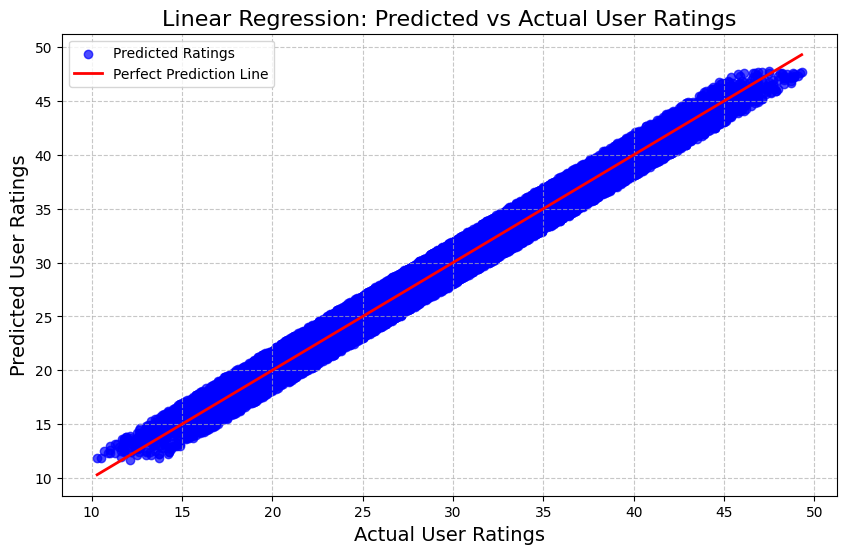

In [7]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score

# Predict and calculate R^2
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print(f"Regression Model R^2 Score: {r_squared:.2f}")

# Plot linear regression graph
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted Ratings')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')
plt.title('Linear Regression: Predicted vs Actual User Ratings', fontsize=16)
plt.xlabel('Actual User Ratings', fontsize=14)
plt.ylabel('Predicted User Ratings', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Here the R^2 score of the regrassion model 
# was calculated along with the linear regression graph

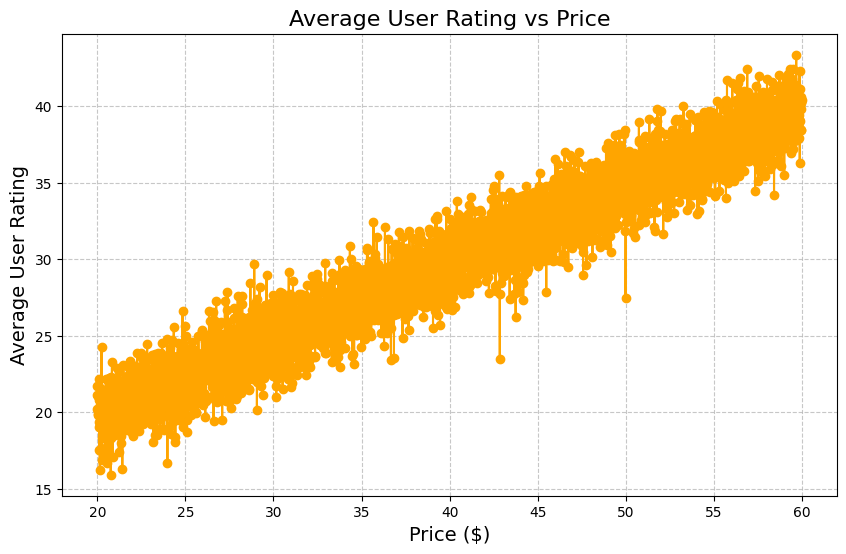

In [8]:
# Higher-priced games tend to have higher user ratings. However, ratings plateau 
# or slightly decrease at very high price points (e.g., premium games above $50).

price_user_rating = data.groupby('Price')['User Rating'].mean().reset_index()

# Plot the line graph of average usr rating vs price
plt.figure(figsize=(10, 6))
plt.plot(price_user_rating['Price'], price_user_rating['User Rating'], marker='o', color='orange')
plt.title('Average User Rating vs Price', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Average User Rating', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

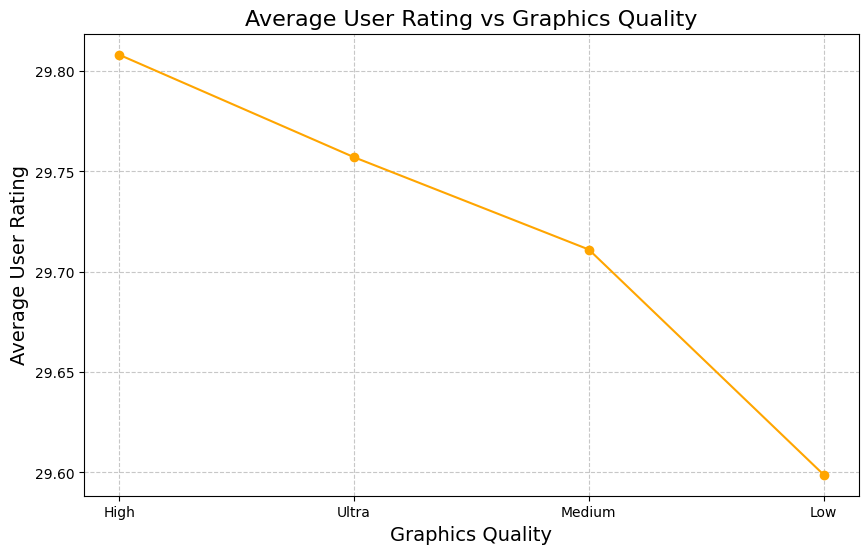

In [9]:
# This is a graph that shows average user rating vs graphics quality. 
# This shows that the higher the graphics the higher the ratings 
# which shows that people prefer higher quality games.
graphics_rating = data.groupby('Graphics Quality')['User Rating'].mean().reset_index()

# Sort by quality levels for meaningful visualization
graphics_rating = graphics_rating.sort_values(by='User Rating', ascending=False)

# Average User Rating vs Graphics Quality
plt.figure(figsize=(10, 6))
plt.plot(graphics_rating['Graphics Quality'], graphics_rating['User Rating'], marker='o', color='orange')
plt.title('Average User Rating vs Graphics Quality', fontsize=16)
plt.xlabel('Graphics Quality', fontsize=14)
plt.ylabel('Average User Rating', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()